In [15]:
# Memuat pustaka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import requests

In [16]:
# import dataset ini dataset\cleaned_mental_data.csv
data = pd.read_csv('dataset/cleaned_mental_data.csv')

print(df.head())

   age  feeling.nervous  panic  breathing.rapidly  sweating  \
0   23                1      0                  1         0   
1   14                1      0                  1         0   
2   25                0      0                  0         0   
3   29                1      0                  0         0   
4   32                1      1                  1         1   

   trouble.in.concentration  trouble.sleeping  trouble.with.work  \
0                         0                 1                  0   
1                         0                 1                  0   
2                         0                 0                  0   
3                         1                 1                  0   
4                         1                 1                  1   

   hopelessness  anger  ...  nightmares  avoids.people.or.activities  \
0             1      0  ...           0                            0   
1             0      1  ...           1                            1

In [17]:
# show unique values in 'disorder' column
print(data['Disorder'].unique())    

['MDD' 'ASD' 'Loneliness' 'bipolar' 'anxiety' 'PTSD' 'sleeping disorder'
 'psychotic depression' 'eating disorder' 'ADHD' 'PDD' 'OCD']


In [18]:
# do label encoding in 'Disorder' column
label_encoder = LabelEncoder()
data['Disorder'] = label_encoder.fit_transform(data['Disorder'])    

In [19]:
# Memisahkan fitur dan target
X = data.drop(columns=['Disorder'])
y = data['Disorder']

In [20]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Mengkodekan label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [22]:
# Membuat model Sequential
model = Sequential()

In [23]:
model = Sequential()
# Menambahkan layer input
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))                                                 
# Menambahkan layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

c:\Users\bania\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Melatih model
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [27]:
# Mengevaluasi model pada data uji
# Evaluasi model
# akusasi_model = model.evaluate(X_test, y_test_encoded, verbose=0)


loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9296875


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


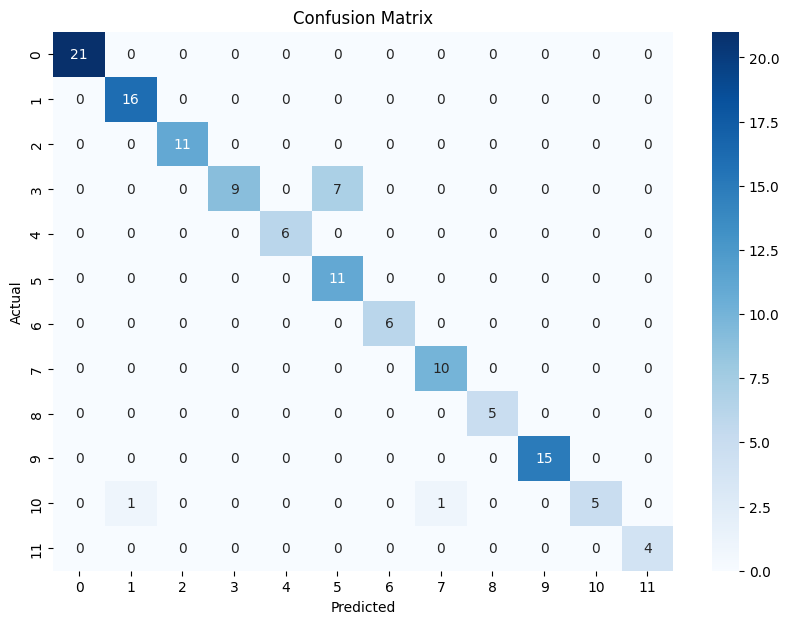

In [28]:
# buat confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test_encoded, model.predict(X_test).argmax(axis=1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()  

In [29]:
# Membuat prediksi
y_pred_encoded = model.predict(X_test).argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [30]:
# Menyimpan model ke file
model.save('model/mental_health_model-2.h5')


In [31]:
# Memuat model yang telah disimpan
from tensorflow.keras.models import load_model

loaded_model = load_model('model/mental_health_model-2.h5')


In [32]:
# Contoh input pengguna
import random
import numpy as np

# input_data = [29,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0]  # Ganti dengan input Anda

# Menghasilkan nilai acak antara 0 atau 1 sebanyak 27 kali

# random_values = [random.randint(0, 1) for _ in range(27)] # random value untuk gejala
# input_data = [23] + random_values # input untuk umur
# print(input_data)
# print("\n")

input_data = [
    23,   # age
    0,    # feeling.nervous
    0,    # panic
    0,    # breathing.rapidly
    0,    # sweating
    1,    # trouble.in.concentration
    1,    # having.trouble.in.sleeping
    1,    # having.trouble.with.work
    0,    # hopelessness
    1,    # anger
    1,    # over.react
    0,    # change.in.eating
    0,    # suicidal.thought
    1,    # feeling.tired
    1,    # close.friend
    0,    # social.media.addiction
    0,    # weight.gain
    1,    # introvert
    0,    # popping.up.stressful.memory
    1,    # having.nightmares
    1,    # avoids.people.or.activities
    0,    # feeling.negative
    1,    # trouble.concentrating
    0,    # blamming.yourself
    0,    # hallucinations
    0,    # repetitive.behaviour
    1,    # seasonally
    1] # increased.energy

print(input_data)
print("\n")

# Konversi input_data menjadi array numpy 2D dan ubah bentuknya agar sesuai dengan kebutuhan model
input_data = np.array([input_data])  # Mengonversi menjadi array numpy 2D dengan satu baris

# Lakukan prediksi
prediction = model.predict(input_data)

# Membuat prediksi
prediction = model.predict(input_data)
print("\n")
print(f"Predicted Disorder: {prediction}")

[23, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Predicted Disorder: [[1.4647515e-01 5.2891052e-01 4.5115236e-02 3.0671395e-03 5.9097824e-03
  2.9133772e-04 3.4587469e-02 3.0688457e-02 1.0770527e-01 1.2336316e-03
  6.6855654e-02 2.9160252e-02]]


Prediction: ASD


ADHD: 14.65%
ASD: 52.89%
Loneliness: 4.51%
MDD: 0.31%
OCD: 0.59%
PDD: 0.03%
PTSD: 3.46%
Anxiety: 3.07%
Bipolar: 10.77%
Eating Disorder: 0.12%
Psychotic Depression: 6.69%
Sleeping Disorder: 2.92%




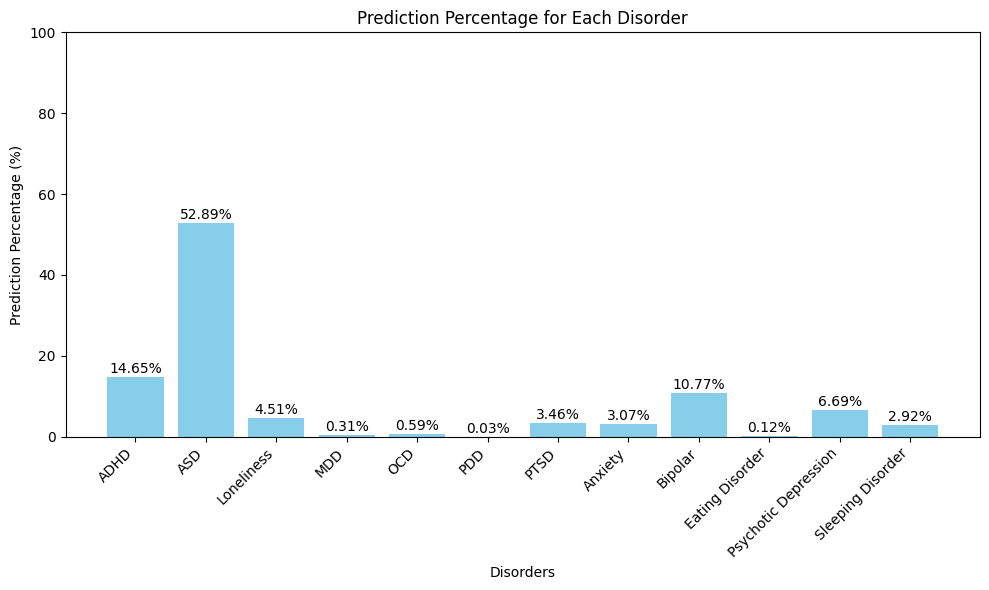

In [33]:
# Labels
labels = {
    0: "ADHD",
    1: "ASD",
    2: "Loneliness",
    3: "MDD",
    4: "OCD",
    5: "PDD",
    6: "PTSD",
    7: "Anxiety",
    8: "Bipolar",
    9: "Eating Disorder",
    10: "Psychotic Depression",
    11: "Sleeping Disorder",
    12: "Inconclusive"
}

# Mengambil label dari prediksi
predicted_label = labels[np.argmax(prediction)]

print(f"Prediction: {predicted_label}")
print("\n")

# Mendapatkan jumlah prediksi untuk setiap penyakit
predicted_percentages = (prediction[0] / prediction[0].sum()) * 100

# Menampilkan persentase prediksi untuk setiap penyakit
for i, percentage in enumerate(predicted_percentages):
    disorder_name = labels[i]
    print(f"{disorder_name}: {percentage:.2f}%")

print("\n")

# PLOT CHART

import matplotlib.pyplot as plt

# Membuat grafik batang menggunakan Matplotlib
disorder_names = [labels[i] for i in range(len(predicted_percentages))]
percentages = [predicted_percentages[i] for i in range(len(predicted_percentages))]

plt.figure(figsize=(10, 6))
plt.bar(disorder_names, percentages, color='skyblue')
plt.xlabel('Disorders')
plt.ylabel('Prediction Percentage (%)')
plt.title('Prediction Percentage for Each Disorder')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Menambahkan persentase di atas setiap batang
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()
